# Activity: Address missing data


## Introduction


The datasets that data professionals use to solve problems typically contain missing values, which must be dealt with in order to achieve clean, useful data. This is particularly crucial in exploratory data analysis (EDA). In this activity, you will learn how to address missing data. 

You are a financial data consultant, and an investor has tasked your team with identifying new business opportunities. To help them decide which future companies to invest in, you will provide a list of current businesses valued at more than $1 billion. These are sometimes referred to as "unicorns." Your client will use this information to learn about profitable businesses in general.

The investor has asked you to provide them with the following data: 
- Companies in the `hardware` industry based in either `Beijing`, `San Francisco`, or `London` 
- Companies in the `artificial intelligence` industry based in `London`
-  A list of the top 20 countries sorted by sum of company valuations in each country, excluding `United States`, `China`, `India`, and `United Kingdom`
- A global valuation map of all countries with companies that joined the list after 2020
- A global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` (a separate map for Europe is also required)

Your dataset includes a list of businesses and data points, such as the year they were founded; their industry; and their city, country, and continent. ata 

## **Step 1: Imports** 

### Import libraries

Import the following relevant Python libraries:
* `numpy`
* `pandas`
* `matplotlib.pyplot`
* `plotly.express`
* `seaborn`



In [1]:
# Import libraries and modules.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Load the dataset


The dataset is currently in CSV format and in a file named `Unicorn_Companies.csv`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
df_companies = pd.read_csv(r"C:\Users\saswa\Documents\GitHub\Python-For-Data-Analysis\Course-3\Data\Common\Unicorn companies.csv")

## **Step 2: Data exploration** 

Explore the dataset and answer questions that will guide your management of missing values. 

### Display top rows

Display the first 10 rows of the data to understand how the dataset is structured.

In [3]:
# Display the first 10 rows of the data.

df_companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


### Statistical properties of the dataset

Use methods and attributes of the dataframe to get information and descriptive statistics for the data, including its range, data types, mean values, and shape. 


In [4]:
# Get the shape of the dataset.

df_companies.shape

(1074, 10)

**Question: What is the shape of the dataset?**

It has 1074 rows and 10 columns.

In [5]:
# Get the data types and number of non-null values in the dataset.

df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


**Question: What are the data types of various columns?**


There are 9 columns with the object data type and 1 column, Year Funded, with the int64 data type. This information can be obtained using the info() method, which provides a summary of column names, non-null counts, and their respective data types.

**Question: How many columns contain null values?**

Two columns, City and Select Investors, have null values. This is evident because their non-null counts are lower than the total number of rows in the dataset. You can verify this using the info() method, which provides a detailed summary of non-null counts for each column.

In [6]:
# Get descriptive statistics such as mean, standard deviation, and range of the numerical columns in the dataset.

df_companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


**Question: In what year was the oldest company founded?**

The oldest company in the dataset was founded in 1919, which is the minimum value in the Year Funded column. This information can be obtained using the describe() method, which provides summary statistics for numerical columns.

### Data Preprocessing

In order to answer the investor's questions, some data preprocessing steps are required. The first step is to add a new column to the dataframe containing just the year each company became a unicorn company. Call this new column `Year Joined`. 

In [7]:
# Create a new column "Year Joined" from "Date Joined".

df_companies['Year_Joined'] = pd.to_datetime(df_companies['Date Joined'], format="%m/%d/%y", errors='coerce').dt.year




In [8]:
df_companies.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
Year_Joined          int32
dtype: object

For each country, you want to calculate the sum of all valuations of companies from that country. However, in order to do this, you'll need to first prepare the data. Currently, the data in the `Valuation` column is a string that starts with a `$` and ends with a `B`. Because this column is not in a numeric datatype, pandas cannot perform mathematical operations on its values. The data in this column needs to be converted to a numeric datatype. 

In this step, define a function called `str_to_num()` that accepts as an argument:

* `x`: a string in the format of the values contained in the `Valuation` column

And returns:

* `x`: an `int` of the number represented by the input string

```
Example:

 [IN]:  str_to_num('$4B')
[OUT]:  4

```


To do this, use the string [`strip()`](https://docs.python.org/3/library/stdtypes.html#str.strip) method. This method is applied to a string. Its argument is a string that contains all the characters that you want to remove from the beginning and end of a given string&mdash;in any order. The specified characters will be removed until a valid character is encountered. This process is applied moving forward from the beginning of the string and also moving in reverse from the end of the string, thus removing unwanted beginning and trailing characters.

```
Example:

 [IN]:  my_string = '#....... Section 3.2.1 Issue #32 .......'
        my_string = my_string.strip('.#! ')
        print(my_string)

[OUT]:  'Section 3.2.1 Issue #32'

```

Note that you must reassign the result back to a variable or else the change will not be permanent. 

In [9]:
# Define the `str_to_num()` function

def str_to_num(x):
    return int(x.strip('$B'))

Now, use this function to create a new column called `valuation_num` that represents the `Valuation` column as an integer value. To do this, use the series method [`apply()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) to apply the `str_to_num()` function to the `Valuation` column.

`apply()` is a method that can be used on a `DataFrame` or `Series` object. In this case, you're using it on the `Valuation` series. The method accepts a function as an argument and applies that function to each value in the series.

```
Example:

 [IN]: def square(x):
           return x ** 2

       my_series = pd.Series([0, 1, 2, 3])
       my_series

[OUT]: 0    0
       1    1
       2    2
       3    3
       dtype: int64

 [IN]: my_series = my_series.apply(square)
       my_series

[OUT]: 0    0
       1    1
       2    4
       3    9
       dtype: int64
```

Notice that the function passed as an argument to the `apply()` method does not have parentheses. It's just the function name.

In [10]:
# Apply the `str_to_num()` function to the `Valuation` column
# and assign the result back to a new column called `valuation_num`

df_companies['valuation_num']=df_companies['Valuation'].apply(str_to_num)

In [11]:
df_companies.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
Year_Joined          int32
valuation_num        int64
dtype: object

In [12]:
df_companies[['Valuation', 'valuation_num']].head()

,Valuation,valuation_num
0,$180B,180
1,$100B,100
2,$100B,100
3,$95B,95
4,$46B,46


### Find missing values

The unicorn companies dataset is fairly clean, with few missing values. 

In [13]:
# Find the number of missing values in each column in this dataset.

df_companies.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
Year_Joined          0
valuation_num        0
dtype: int64

 **Question: How many missing values are in each column in the dataset?**

The dataset contains missing values in two columns:

- The City column has 16 missing values.
- The Select Investors column has 1 missing value.
  
All other columns have no missing values. You can determine this by using the isnull().sum() method, which provides the count of missing values for each column.

### Review rows with missing values

Before dealing with missing values, it's important to understand the nature of the missing value that is being filled. Display all rows with missing values from `df_companies`. To do this, perform the following three steps:

1. Apply the `isna()` method to the `df_companies` dataframe as you did in the last step. Remember, this results in a dataframe of the same shape as `df_companies` where each value is `True` if its contents are `NaN` and a `False` if its contents are not `NaN`. Assign the results to a variable called `mask`.

In [14]:
# 1. Apply the `isna()` method to the `df_companies` dataframe and assign back to `mask`

mask=df_companies.isna()
mask.tail()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined,valuation_num
1069,False,False,False,False,False,False,False,False,False,False,False,False
1070,False,False,False,False,False,False,False,False,False,False,False,False
1071,False,False,False,False,False,False,False,False,False,False,False,False
1072,False,False,False,False,False,False,False,False,False,False,False,False
1073,False,False,False,False,False,False,False,False,False,False,False,False


You're not done yet. You still need to go from this dataframe of Boolean values to a dataframe of just the rows of `df_companies` that contain at least one `NaN` value. This means that you need a way to find the indices of the rows of the Boolean dataframe that contain at least one `True` value, then extract those indices from `df_companies`. 

You can do this using the [`any()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html) method for `DataFrame` objects. This method returns a Boolean `Series` indicating whether any value is `True` over a specified axis.

```
Example:

df =     
        A      B    C
    0   0      a    10
    1   False  0    1
    2   NaN    NaN  NaN


 [IN]: df.any(axis=0)

[OUT]: A    False
       B     True
       C     True
       dtype: bool
       
 [IN]: df.any(axis=1)
 
[OUT]: 0     True
       1     True
       2    False
       dtype: bool
```

Note that `0`, `False`, and `NaN` are considered `False` and anything else is considered `True`. 

2. Apply the `any()` method to the Boolean dataframe you created to make a Boolean series where each element in the series represents `True` if a row of the dataframe contains any `True` values and `False` if any row in the dataframe contains any `False` values. Assign the results back to `mask`.

In [15]:
# 2. Apply the `any()` method to `mask` and assign the results back to `mask`

mask = mask.any(axis=1)
mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

3. Because `mask` is now a series of Boolean values, you can use it as a Boolean mask. Apply the Boolean mask to the `df_companies` dataframe to return a filtered dataframe containing just the rows that contain a missing value. Assign the results to a variable called `df_missing_rows`.

In [16]:
# 3. Apply `mask` as a Boolean mask to `df_companies` and assign results to `df_missing_rows`

df_missing_rows = df_companies[mask]
df_missing_rows

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined,valuation_num
12,FTX,$32B,7/20/21,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,7/22/19,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,6/21/21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,6/1/21,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


In [17]:
df_missing_rows.shape

(17, 12)

In [18]:
df_missing_rows.size

204

**Question: Is there a specific country/region that shows up a lot in this missing values dataframe? Which one?**


Out of the 17 rows with missing values, 12 belong to companies based in Singapore. This information highlights that the majority of missing data is associated with a specific country/region.

**Question: What steps did you take to find missing data?**


To identify missing data:

- I applied DataFrame.isna() to the dataframe, which created a Boolean mask where True indicates a missing (NaN) value.
- I then used any(axis=1) to evaluate each row across all columns. This function checks if any entry in a row is True, signifying the presence of at least one missing value in that row.
- The resulting Boolean series was applied as a mask to the dataframe to filter out the rows containing missing values.
- This process revealed that 17 rows had at least one missing value, corresponding to 16 missing values in the City column and 1 in the Select Investors column.

**Question: What observations can be made about the forms and context of missing data?**


The missing values in this dataset are context-specific and are both of the object data type.

- The City column has 16 missing values, which would otherwise be of the str type.
- The Select Investors column has 1 missing value, also of the str type.
  
This observation highlights that missing values can vary in form and often depend on the context of the data. For instance, not all missing values are explicitly marked as na, None, or Null; they may arise due to incomplete data collection or formatting issues.

**Question: What other methods could you use to address missing data?**


To address missing data effectively, the following methods could be used:

- Consult with business users or stakeholders to gain insights into the causes of missing values. Understanding the context can help determine the most appropriate way to handle them.
- Leverage domain knowledge to impute missing values intelligently, ensuring the imputation aligns with the data's context and purpose.
- Consider other strategies such as removing rows with missing data (if they are few and their removal does not significantly impact the analysis) or filling missing values using statistical techniques like mean, median, or mode imputation.
- Use advanced techniques like predictive modeling to estimate missing values based on the relationships between variables in the dataset.

## Step 3: Model building

Think of the model you are building as the completed dataset, which you will then use to inform the questions the investor has asked of you.  

### Two ways to address missing values

There are several ways to address missing values, which is critical in EDA. The two primary methods are removing them and imputing other values in their place. Choosing the proper method depends on the business problem and the value the solution will add or take away from the dataset.

Here, you will try both. 

To compare the the effect of different actions, first store the original number of values in a variable. Create a variable called `count_total` that is an integer representing the total number of values in `df_companies`. For example, if the dataframe had 5 rows and 2 columns, then this number would be 10.

In [19]:
df_companies.shape

(1074, 12)

In [20]:
# Store the total number of values in a variable called `count_total`

count_total = df_companies.size
count_total

12888

Now, remove all rows containing missing values and store the total number of remaining values in a variable called `count_dropna_rows`.

In [21]:
# Drop the rows containing missing values, determine number of remaining values 

count_dropna_rows=df_companies.dropna().size
count_dropna_rows

12684

Now, remove all columns containing missing values and store the total number of cells in a variable called `count_dropna_columns`.

In [22]:
# Drop the columns containing missing values, determine number of remaining values

### YOUR CODE HERE ###

count_dropna_columns = df_companies.dropna(axis=1).size
count_dropna_columns

10740

Next, print the percentage of values removed by each method and compare them.

In [23]:
# Print the percentage of values removed by dropping rows.
row_percent = ((count_total - count_dropna_rows) / count_total) * 100
print(f'Percentage removed, rows: {row_percent:.3f}')


# Print the percentage of values removed by dropping columns.
col_percent = ((count_total - count_dropna_columns) / count_total) * 100
print(f'Percentage removed, columns: {col_percent:.3f}')



Percentage removed, rows: 1.583
Percentage removed, columns: 16.667


**Question: Which method was most effective? Why?**


The row-wise removal of missing values was more effective in this case, as it resulted in less data loss. While both row and column removal strategies lead to a dataset without missing values, the row-wise approach retained more of the data compared to column removal.

In this context, dropping rows proved to be the best option because it minimized the loss of valuable information, given that the columns with missing values were not crucial for the analysis. If the dataset had fewer rows or if column-specific data were more critical, dropping columns might have been a better approach. However, in general, for datasets with more rows than columns, dropping rows is often the most effective method to preserve the dataset's integrity.

Now, practice the second method: imputation. Perform the following steps:

1. Use the [`fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) dataframe method to fill each missing value with the next non-NaN value in its column. Assign the results to a new dataframe called `df_companies_backfill`.

```
Example:

df =     
        A    B    C
    0   5    a    NaN
    1   10   NaN  False
    2   NaN  c    True

 [IN]: df.fillna(method='backfill')
 
[OUT]: 
        A    B    C
    0   5    a    False
    1   10   c    False
    2   NaN  c    True

```

Notice that if there is a `NaN` value in the last row, it will not backfill because there is no subsequent value in the column to refer to. 

2. Show the rows that previously had missing values.

In [24]:
# 1. Fill missing values using the 'fillna()' method, back-filling

df_companies_backfill = df_companies.bfill()

# 2. Show the rows that previously had missing values

df_companies_backfill.iloc[df_missing_rows.index, :]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined,valuation_num
12,FTX,$32B,7/20/21,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,7/22/19,Artificial intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,6/21/21,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve...",2015,1
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,6/1/21,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


**Question: Do the values that were used to fill in for the missing values make sense?**


No, the values used to fill in the missing data via backfilling do not make sense in this context. Backfilling can introduce inaccuracies, particularly if the city-level information is being used for analysis. The backfilled values might lead to a company being incorrectly associated with a city in a different country, skewing any city-wise trends or analysis related to valuations or other metrics. This issue arises because backfilling does not take into account the geographical or contextual relationship between the data points, which can result in misleading conclusions when performing regional or city-based analyses.

Another option is to fill the values with a certain value, such as 'Unknown'. However, doing so doesn’t add any value to the dataset and could make finding the missing values difficult in the future. Reviewing the missing values in this dataset determines that it is fine to leave the values as they are. This also avoids adding bias to the dataset.

## Step 4: Results and evaluation

Now that you've addressed your missing values, provide your investor with their requested data points.

### Companies in the `Hardware` Industry

Your investor is interested in identifying unicorn companies in the `Hardware` industry in the following cities: `Beijing`, `San Francisco`, and `London`. They are also interested in companies in the `Artificial intelligence` industry in `London`. 

Write a selection statement that extracts the rows that meet these criteria. This task requires complex conditional logic. Break the process into the following parts.

1. Create a mask to apply to the `df_companies` dataframe. The following logic is a pseudo-code representation of how this mask could be structured.

```
((Industry==Hardware) and (City==Beijing, San Francisco, or London)) 
OR  
((Industry==Artificial intelligence) and (City==London))
```

You're familiar with how to create Boolean masks based on conditional logic in pandas. However, you might not know how to write a conditional statement that selects rows that have _any one of several possible values_ in a given column. In this case, this is the `(City==Beijing, San Francisco, or London)` part of the expression.

For this type of construction, use the [`isin()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin) `Series` method. This method is applied to a pandas series and, for each value in the series, checks whether it is a member of whatever is passed as its argument.

```
Example:

 [IN]: my_series = pd.Series([0, 1, 2, 3])
       my_series
       
[OUT]: 0    0
       1    1
       2    2
       3    3
       dtype: int64
       
 [IN]: my_series.isin([1, 2])
       
[OUT]: 0    False
       1     True
       2     True
       3    False
       dtype: bool
       
```

2. Apply the mask to the `df_companies` dataframe and assign the result to a new variable called `df_invest`.

In [25]:
# 1. Create a Boolean mask using conditional logic
cities=['Beijing', 'San Francisco', 'London']
invest_mask= (
    (df_companies['Industry']=='Hardware') & (df_companies['City'].isin(cities))
) | (
    (df_companies['Industry']=='Artificial intelligence') & (df_companies['City']=='London')
)

# 2. Apply the mask to the `df_companies` dataframe and assign the results to `df_invest`

df_invest = df_companies[invest_mask]
df_invest

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined,valuation_num
36,Bitmain,$12B,7/6/18,Hardware,Beijing,China,Asia,2015,$765M,"Coatue Management, Sequoia Capital China, IDG ...",2018,12
43,Global Switch,$11B,12/22/16,Hardware,London,United Kingdom,Europe,1998,$5B,"Aviation Industry Corporation of China, Essenc...",2016,11
147,Chipone,$5B,12/16/21,Hardware,Beijing,China,Asia,2008,$1B,"China Grand Prosperity Investment, Silk Road H...",2021,5
845,Density,$1B,11/10/21,Hardware,San Francisco,United States,North America,2014,$217M,"Founders Fund, Upfront Ventures, 01 Advisors",2021,1
873,BenevolentAI,$1B,6/2/15,Artificial intelligence,London,United Kingdom,Europe,2013,$292M,Woodford Investment Management,2015,1
923,Geek+,$1B,11/21/18,Hardware,Beijing,China,Asia,2015,$439M,"Volcanics Ventures, Vertex Ventures China, War...",2018,1
1040,TERMINUS Technology,$1B,10/25/18,Hardware,Beijing,China,Asia,2015,$623M,"China Everbright Limited, IDG Capital, iFLYTEK",2018,1
1046,Tractable,$1B,6/16/21,Artificial intelligence,London,United Kingdom,Europe,2014,$120M,"Insight Partners, Ignition Partners, Georgian ...",2021,1


**Question: How many companies meet the criteria given by the investor?**


Eight companies meet the criteria specified by the investor.

### List of countries by sum of valuation

For each country, sum the valuations of all companies in that country, then sort the results in descending order by summed valuation. Assign the results to a variable called `national_valuations`.

In [26]:
# Group the data by`Country/Region`
national_valuations=df_companies.groupby(['Country/Region'])['valuation_num'].sum().sort_values(ascending=False).reset_index()
# Print the top 15 values of the DataFrame.

national_valuations.head(15)

,Country/Region,valuation_num
0,United States,1933
1,China,696
2,India,196
3,United Kingdom,195
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41


**Question: Which countries have the highest sum of valuation?**

The sorted data reveals that the four countries with the highest total company valuations are the United States, China, India, and the United Kingdom. However, since these countries are considered outliers by the investor, they are excluded from the list.

### Filter out top 4 outlying countries

Use this grouped and summed data to plot a barplot. However, to meet the needs of your stakeholder, you must first remove the United States, China, India, and the United Kingdom. Remove these countries from `national_valuations` and reassign the results to a variable called `national_valuations_no_big4`.

In [27]:
# Remove outlying countries
national_valuations_no_big4 = national_valuations.iloc[4:, :]

national_valuations_no_big4.head()


,Country/Region,valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


### BONUS CONTENT: Alternative approach (optional)

You can also use `isin()` to create a Boolean mask to filter out specific values of the `Country/Region` column. In this case, this process is longer and more complicated than simply using the iloc[] statement. However, there will be situations where this is the most direct approach. 
    
How could you use `isin()` and your knowledge of pandas conditional operators and Boolean masks to accomplish the same task?


In [28]:
# (Optional) Use `isin()` to create a Boolean mask to accomplish the same task

countries = ['United States', 'China', 'India', 'United Kingdom']
national_valuations_no_big4 = national_valuations[~national_valuations['Country/Region'].isin(countries)]

### Create barplot for top 20 non-big-4 countries

Now, the data is ready to reveal the top 20 non-big-4 countries with the highest total company valuations. Use seaborn's [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function to create a plot showing national valuation on one axis and country on the other.

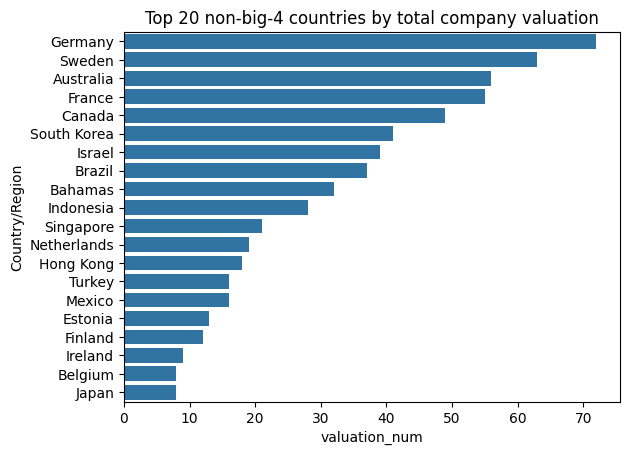

In [29]:
# Create a barplot to compare the top 20 countries with highest company valuations.

sns.barplot(data=national_valuations_no_big4.head(20),
            y='Country/Region',
            x='valuation_num')
plt.title('Top 20 non-big-4 countries by total company valuation')

# Show the plot.

plt.show();

### Plot maps

Your investor has also asked for a global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` (a.k.a. "big-four countries").

You have learned about using [`scatter_geo()`](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo) from the `plotly.express` library to create plot data on a map. Create a `scatter_geo()` plot that depicts the total valuations of each non-big-four country on a world map, where each valuation is shown as a circle on the map, and the size of the circle is proportional to that country's summed valuation.

In [31]:
# Plot the sum of valuations per country.

data = national_valuations_no_big4

fig=px.scatter_geo(data, 
               locations='Country/Region', 
               size='valuation_num', 
               locationmode='country names', 
               color='Country/Region',
               title='Total company valuations by country (non-big-four)')


fig.show(renderer="browser")


**Question: How is the valuation sum per country visualized in the plot?**


The valuation sum per country is visualized by adjusting the size of the circles on the map, with larger circles representing higher total valuations.

**Question: Does any region stand out as having a lot of activity?**


Yes, Europe stands out as having a high concentration of unicorn companies, with significant activity clustered in specific areas.

## Conclusion

**What are some key takeaways that you learned during this lab?**

- During this lab, I learned the significance of addressing missing data carefully, considering the potential consequences of removing or altering it, and engaging with stakeholders or data providers to understand its context.
- I gained familiarity with various pandas functions, particularly isin(), and explored nuances in how to effectively utilize them.
- I learned how to plot a map to visualize data trends and patterns, expanding my skills in data visualization.
  
Key Takeaways:

- Missing data is a common challenge in data analysis.
- Properly handling missing values is a critical part of the data-cleaning process and essential for Exploratory Data Analysis (EDA).
- There are two main approaches for addressing missing values: removal or imputation.
- When addressing missing data, it's important to consider the business context, the nature of the data, and the objectives of the analysis to avoid introducing bias.

**How would you present your findings from this lab to others? Consider the information you would provide (and what you would omit), how you would share the various data insights, and how data visualizations could help your presentation.**

To present my findings, I would focus on the key insights derived from the data analysis, highlighting specific points that align with the requirements of the stakeholders or audience.

- Industry-Specific Companies and Locations:

  - I would provide a brief list of companies and their locations, focusing on those in specific industries or regions that meet the given criteria, without overloading the audience with excessive details.

- Top 20 Countries by Sum of Valuations:

  - I would use a visualization such as a bar chart or scatter plot to represent the top 20 countries based on the total company valuations, excluding outlier countries like the United States, China, India, and the United Kingdom.
  - A simple list could also be provided for reference, but visualizations would help to make the findings more accessible and engaging.
  
- Valuation Map Insights:

  - I would present the valuation map, showing how the valuations are distributed across countries. In addition to the map, I would provide a concise summary of the key data points without delving too deep into unnecessary breakdowns, as the investor did not request additional details.
  
- Key Takeaways and Conclusions:

  - I would highlight important conclusions from the data analysis, such as regional trends, missing data handling, and the importance of business context when addressing missing values.
  - I would emphasize the visualizations in the presentation to aid in a clear understanding of the insights and trends.
  
By keeping the presentation concise yet informative and using visualizations effectively, I would ensure the audience easily grasps the key findings while focusing on the most relevant data points.


**Reference**

[Bhat, M.A. *Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies)

